In [1]:
library(forecast)
library(caret)
library(glmnet)
library(data.table)
library(fpp2)
library(skimr)
library(ggcorrplot)
library(zoo)
library(lubridate)
library(urca)
library(rpart)
library(rattle)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Loading required package: ggplot2

Loading required package: lattice

Loading required package: Matrix

Loaded glmnet 4.1-3

-- Attaching packages -------------------------------------------------------------------------------------- fpp2 2.4 --

v fma       2.4     v expsmooth 2.3




Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric



Attaching package: 'lubridate'


The following objects are masked from 'package:data.table':

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


The following objects are masked from 'package:base':

    date, intersect, setdiff, union


Loading required package: tibble

Loading required package: bitops


Attaching package: 'bitops'


The following object is masked from 'package:Matrix':

    %&%


Rattle: A free graphical interface for data science with R.
Ver

In [2]:
path="C:/Users/alpsr/Desktop/IE 48B Project/Codes/"

options(repr.matrix.max.cols=50, repr.matrix.max.rows=100)
options(warn=-1)
sprintf("%sbulk_imbalance.csv", path)

#"C:\Users\alpsr\Desktop\IE 48B Project\Codes\bulk_imbalance.csv"

[1] "C:/Users/alpsr/Desktop/IE 48B Project/Codes/bulk_imbalance.csv"

In [3]:
bulk_imbalance = fread(sprintf('%sbulk_imbalance.csv', path))
str(bulk_imbalance)

Classes 'data.table' and 'data.frame':	26832 obs. of  12 variables:
 $ date                   : IDate, format: "2019-01-01" "2019-01-01" ...
 $ hour                   : int  0 1 2 3 4 5 6 7 8 9 ...
 $ net                    : num  -1935 -751 -983 -765 -1233 ...
 $ upRegulationZeroCoded  : num  0 0 0 0 0 0 0 0 0 0 ...
 $ upRegulationOneCoded   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ upRegulationTwoCoded   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ downRegulationZeroCoded: num  2289 808 1061 1120 1875 ...
 $ downRegulationOneCoded : num  0 0 0 0 56 56 0 0 0 0 ...
 $ downRegulationTwoCoded : int  0 0 0 0 0 0 0 0 0 0 ...
 $ upRegulationDelivered  : num  0 0 0 0 0 0 0 0 0 0 ...
 $ downRegulationDelivered: num  -1935 -751 -983 -765 -1233 ...
 $ system_direction       : chr  "Negative" "Negative" "Negative" "Negative" ...
 - attr(*, ".internal.selfref")=<externalptr> 


In [4]:
data = bulk_imbalance
data = data[order(date,hour)]
data[,ID := 1:.N]

## Dataset

In [5]:
head(data, 128)

date,hour,net,upRegulationZeroCoded,upRegulationOneCoded,upRegulationTwoCoded,downRegulationZeroCoded,downRegulationOneCoded,downRegulationTwoCoded,upRegulationDelivered,downRegulationDelivered,system_direction,ID
<date>,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<chr>,<int>
2019-01-01,0,-1934.795,0.000,0,0,2288.567,0,0,0.000,-1934.795,Negative,1
2019-01-01,1,-750.866,0.000,0,0,808.083,0,0,0.000,-750.866,Negative,2
2019-01-01,2,-982.767,0.000,0,0,1060.750,0,0,0.000,-982.767,Negative,3
2019-01-01,3,-764.620,0.000,0,0,1120.483,0,0,0.000,-764.620,Negative,4
2019-01-01,4,-1233.289,0.000,0,0,1874.633,56,0,0.000,-1233.289,Negative,5
2019-01-01,5,-1469.061,0.000,0,0,2125.000,56,0,0.000,-1469.061,Negative,6
2019-01-01,6,-1444.749,0.000,0,0,2086.000,0,0,0.000,-1444.749,Negative,7
2019-01-01,7,-1339.938,0.000,0,0,1963.000,0,0,0.000,-1339.938,Negative,8
2019-01-01,8,-1884.543,0.000,0,0,2509.767,0,0,0.000,-1884.543,Negative,9


In [6]:
skim(data)

-- Data Summary ------------------------
                           Values
Name                       data  
Number of rows             26832 
Number of columns          13    
Key                        NULL  
_______________________          
Column type frequency:           
  character                1     
  Date                     1     
  numeric                  11    
________________________         
Group variables            None  

-- Variable type: character ----------------------------------------------------
# A tibble: 1 x 8
  skim_variable    n_missing complete_rate   min   max empty n_unique whitespace
* <chr>                <int>         <dbl> <int> <int> <int>    <int>      <int>
1 system_direction         0             1     0     8    24        4          0

-- Variable type: Date ---------------------------------------------------------
# A tibble: 1 x 7
  skim_variable n_missing complete_rate min        max        median    
* <chr>             <int>         <

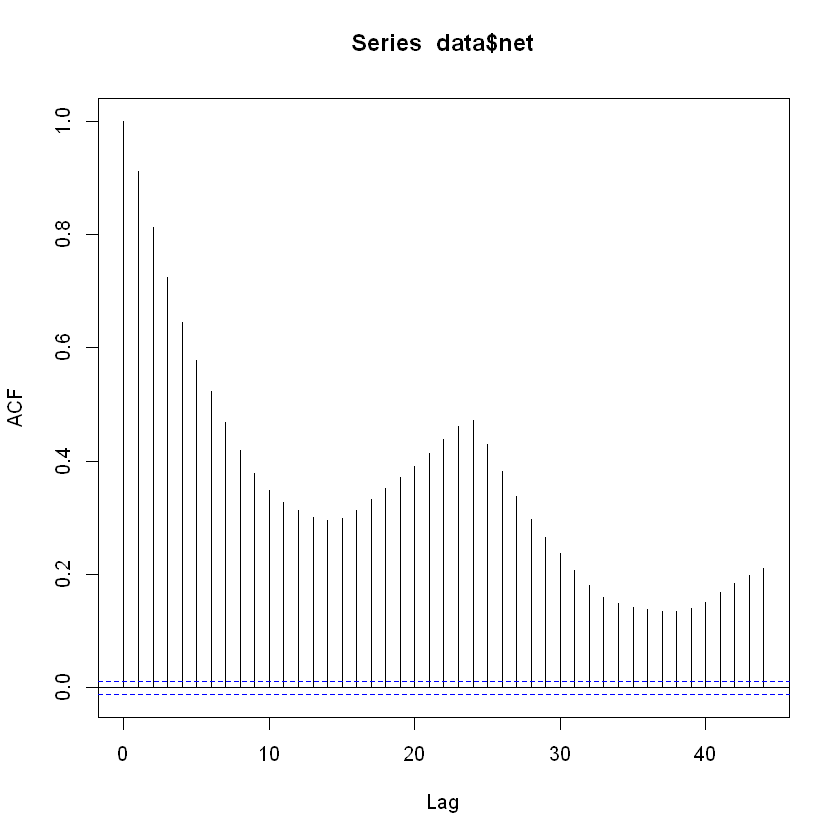

In [7]:
data[,net := na.aggregate(net,by=.(hour,wday(date)))]
acf(data$net)

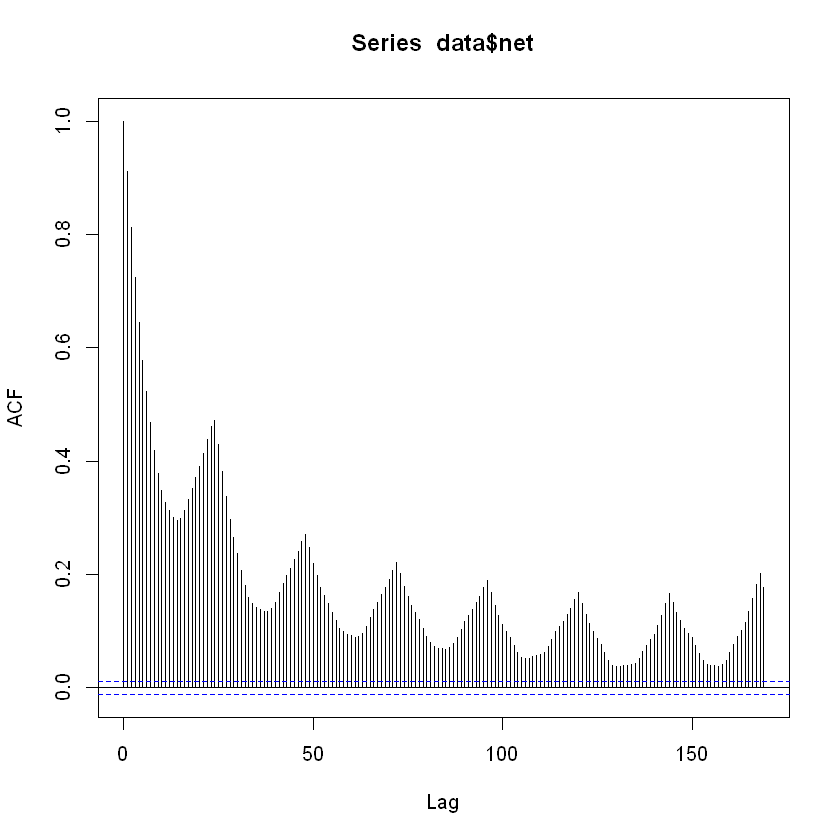

In [8]:
acf <- acf(data$net,lag.max = 169)

In [9]:
acf


Autocorrelations of series 'data$net', by lag

    0     1     2     3     4     5     6     7     8     9    10    11    12 
1.000 0.912 0.813 0.724 0.645 0.579 0.523 0.469 0.420 0.379 0.349 0.328 0.313 
   13    14    15    16    17    18    19    20    21    22    23    24    25 
0.301 0.296 0.300 0.313 0.332 0.353 0.371 0.391 0.414 0.438 0.461 0.472 0.429 
   26    27    28    29    30    31    32    33    34    35    36    37    38 
0.381 0.337 0.298 0.266 0.236 0.207 0.180 0.160 0.149 0.142 0.139 0.135 0.135 
   39    40    41    42    43    44    45    46    47    48    49    50    51 
0.140 0.151 0.168 0.185 0.198 0.211 0.226 0.241 0.258 0.271 0.247 0.220 0.198 
   52    53    54    55    56    57    58    59    60    61    62    63    64 
0.178 0.162 0.149 0.134 0.118 0.106 0.099 0.095 0.093 0.089 0.091 0.097 0.108 
   65    66    67    68    69    70    71    72    73    74    75    76    77 
0.124 0.139 0.151 0.164 0.178 0.191 0.207 0.222 0.202 0.180 0.162 0.146 0.133 
   7

In [10]:
data[hour < 12,last_obs := shift(net,7)]
data$last_obs <- c(rep(NA,7),na.locf(data$last_obs))
data[, lag_24:=shift(net, 24)]
data[, lag_168:=shift(net, 168)]
data[, lag_6:=shift(net, 6)]
data[, lag_7:=shift(net, 7)]
data[, lag_8:=shift(net, 8)]
data <- data[seq(-168,-1),]

In [11]:
data$weekday=wday(data$date)
data[, is_monday:=ifelse(weekday==2, 1, 0)]
data[, is_wday:=ifelse(weekday%in%c(3,4,5), 1, 0)]
data[, is_friday:=ifelse(weekday==6, 1, 0)]
data[, is_saturday:=ifelse(weekday==7, 1, 0)]
data[, is_sunday:=ifelse(weekday==1, 1, 0)]

In [12]:
data[, is_over:=ifelse(hour%in% c(17,18,19,20) , 1, 0)]
data[, is_12:=ifelse(hour==12 , 1, 0)]
data[, is_13:=ifelse(hour==13 , 1, 0)]
data[, is_22:=ifelse(hour==22 , 1, 0)]
data[, is_23:=ifelse(hour==23 , 1, 0)]

In [13]:
upper_limit=quantile(data$net, 0.975)
lower_limit=quantile(data$net, 0.025)
data[, is_outlier:=ifelse((net<=upper_limit) &  (net>=lower_limit), 0, 1)]
data[, net_shift:=shift(net, 168)]
data[is_outlier==1, net:=net_shift]
data$net_shift=NULL
data$is_outlier=NULL

In [14]:
skim(data)

-- Data Summary ------------------------
                           Values
Name                       data  
Number of rows             26664 
Number of columns          30    
Key                        NULL  
_______________________          
Column type frequency:           
  character                1     
  Date                     1     
  numeric                  28    
________________________         
Group variables            None  

-- Variable type: character ----------------------------------------------------
# A tibble: 1 x 8
  skim_variable    n_missing complete_rate   min   max empty n_unique whitespace
* <chr>                <int>         <dbl> <int> <int> <int>    <int>      <int>
1 system_direction         0             1     0     8    24        4          0

-- Variable type: Date ---------------------------------------------------------
# A tibble: 1 x 7
  skim_variable n_missing complete_rate min        max        median    
* <chr>             <int>         <

In [15]:
data[,net := na.aggregate(net,by=.(hour,wday(date)))]

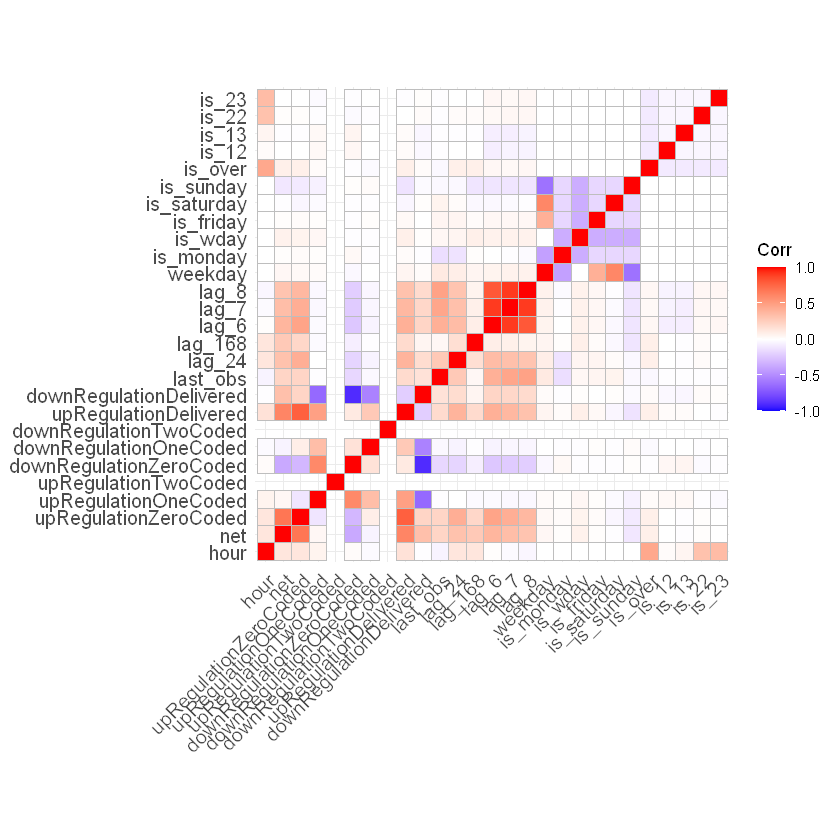

In [16]:
corr <- cor(data[,-c('date','ID', 'system_direction')])
ggcorrplot(corr)
#corr

# Performance Function

In [17]:
perf_dt=function(type,actual,forecast){
    name=type
    n=length(actual)
    error=actual-forecast
    mean=mean(actual)
    sd=sd(actual)
    FBias=sum(error)/sum(actual)
    MPE=sum(error/actual)/n
    MAPE=sum(abs(error/actual))/n
    RMSE=sqrt(sum(error^2))/n
    MAD=sum(abs(error))/n
    WMAPE=MAD/mean
    l=data.frame(name,n,mean,sd,FBias,MAPE,RMSE,MAD,WMAPE)
    return(l)
}

In [18]:
head(data)

date,hour,net,upRegulationZeroCoded,upRegulationOneCoded,upRegulationTwoCoded,downRegulationZeroCoded,downRegulationOneCoded,downRegulationTwoCoded,upRegulationDelivered,downRegulationDelivered,system_direction,ID,last_obs,lag_24,lag_168,lag_6,lag_7,lag_8,weekday,is_monday,is_wday,is_friday,is_saturday,is_sunday,is_over,is_12,is_13,is_22,is_23
<date>,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2019-01-08,0,-464.400,0.000,0,0,761.616,0,0,0.000,-464.400,Negative,169,391.953,-1176.657,-1934.795,1427.524,1628.765,2276.499,3,0,1,0,0,0,0,0,0,0,0
2019-01-08,1,-8.662,245.833,0,0,259.067,0,0,206.833,-215.495,Neutral,170,520.383,-406.941,-750.866,1173.955,1427.524,1628.765,3,0,1,0,0,0,0,0,0,0,0
2019-01-08,2,70.445,274.748,0,0,17.100,0,0,85.145,-14.700,Positive,171,655.970,-403.687,-982.767,145.134,1173.955,1427.524,3,0,1,0,0,0,0,0,0,0,0
2019-01-08,3,60.549,352.000,0,0,0.000,0,0,60.549,0.000,Positive,172,1643.066,-579.674,-764.620,-35.417,145.134,1173.955,3,0,1,0,0,0,0,0,0,0,0
2019-01-08,4,43.140,352.000,0,0,0.000,0,0,43.140,0.000,Neutral,173,2104.923,467.443,-1233.289,-392.690,-35.417,145.134,3,0,1,0,0,0,0,0,0,0,0
2019-01-08,5,25.490,212.000,0,0,0.000,0,0,25.490,0.000,Neutral,174,2278.064,391.953,-1469.061,92.241,-392.690,-35.417,3,0,1,0,0,0,0,0,0,0,0


## Train-Test

In [19]:
data[,hour_num := hour]
data[,hour := as.factor(hour)]
train=data[date <= "2021-11-30",]
test=data[date >= "2021-12-01" & date<="2021-12-14",]

In [20]:
head(train)

date,hour,net,upRegulationZeroCoded,upRegulationOneCoded,upRegulationTwoCoded,downRegulationZeroCoded,downRegulationOneCoded,downRegulationTwoCoded,upRegulationDelivered,downRegulationDelivered,system_direction,ID,last_obs,lag_24,lag_168,lag_6,lag_7,lag_8,weekday,is_monday,is_wday,is_friday,is_saturday,is_sunday,is_over,is_12,is_13,is_22,is_23,hour_num
<date>,<fct>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
2019-01-08,0,-464.400,0.000,0,0,761.616,0,0,0.000,-464.400,Negative,169,391.953,-1176.657,-1934.795,1427.524,1628.765,2276.499,3,0,1,0,0,0,0,0,0,0,0,0
2019-01-08,1,-8.662,245.833,0,0,259.067,0,0,206.833,-215.495,Neutral,170,520.383,-406.941,-750.866,1173.955,1427.524,1628.765,3,0,1,0,0,0,0,0,0,0,0,1
2019-01-08,2,70.445,274.748,0,0,17.100,0,0,85.145,-14.700,Positive,171,655.970,-403.687,-982.767,145.134,1173.955,1427.524,3,0,1,0,0,0,0,0,0,0,0,2
2019-01-08,3,60.549,352.000,0,0,0.000,0,0,60.549,0.000,Positive,172,1643.066,-579.674,-764.620,-35.417,145.134,1173.955,3,0,1,0,0,0,0,0,0,0,0,3
2019-01-08,4,43.140,352.000,0,0,0.000,0,0,43.140,0.000,Neutral,173,2104.923,467.443,-1233.289,-392.690,-35.417,145.134,3,0,1,0,0,0,0,0,0,0,0,4
2019-01-08,5,25.490,212.000,0,0,0.000,0,0,25.490,0.000,Neutral,174,2278.064,391.953,-1469.061,92.241,-392.690,-35.417,3,0,1,0,0,0,0,0,0,0,0,5


In [21]:
head(test)

date,hour,net,upRegulationZeroCoded,upRegulationOneCoded,upRegulationTwoCoded,downRegulationZeroCoded,downRegulationOneCoded,downRegulationTwoCoded,upRegulationDelivered,downRegulationDelivered,system_direction,ID,last_obs,lag_24,lag_168,lag_6,lag_7,lag_8,weekday,is_monday,is_wday,is_friday,is_saturday,is_sunday,is_over,is_12,is_13,is_22,is_23,hour_num
<date>,<fct>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
2021-12-01,0,-407.129,40.000,0,0,460.55,0,0,37.100,-444.229,Negative,25561,-297.689,-414.417,493.904,-500.934,-432.022,-839.498,4,0,1,0,0,0,0,0,0,0,0,0
2021-12-01,1,-17.096,250.150,0,0,269.40,0,0,250.150,-267.246,Neutral,25562,545.407,-28.266,1151.201,-265.800,-500.934,-432.022,4,0,1,0,0,0,0,0,0,0,0,1
2021-12-01,2,108.250,107.250,5,0,0.00,0,0,108.250,0.000,Positive,25563,1259.204,-81.666,602.760,-260.893,-265.800,-500.934,4,0,1,0,0,0,0,0,0,0,0,2
2021-12-01,3,5.000,0.000,5,0,0.00,0,0,5.000,0.000,Neutral,25564,246.265,19.440,705.290,-466.796,-260.893,-265.800,4,0,1,0,0,0,0,0,0,0,0,3
2021-12-01,4,40.000,0.000,40,0,0.00,0,0,40.000,0.000,Neutral,25565,952.266,-67.567,808.653,-458.977,-466.796,-260.893,4,0,1,0,0,0,0,0,0,0,0,4
2021-12-01,5,109.466,20.766,90,0,0.00,0,0,109.466,0.000,Positive,25566,145.144,-297.689,832.158,699.439,-458.977,-466.796,4,0,1,0,0,0,0,0,0,0,0,5


# 1: Trend

In [22]:
trend_lm <- lm(net~ID,train)
summary(trend_lm)


Call:
lm(formula = net ~ ID, data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-4112.1  -526.9   -81.1   502.1  8103.4 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 6.555e+01  1.056e+01   6.205 5.55e-10 ***
ID          1.616e-02  7.134e-04  22.648  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 833.3 on 25390 degrees of freedom
Multiple R-squared:  0.0198,	Adjusted R-squared:  0.01976 
F-statistic: 512.9 on 1 and 25390 DF,  p-value: < 2.2e-16


# 2: Day of Week

In [23]:
dayoftheweek_lm <- lm(net ~ is_monday+is_wday+is_friday+is_saturday+is_sunday, train)
summary(dayoftheweek_lm)


Call:
lm(formula = net ~ is_monday + is_wday + is_friday + is_saturday + 
    is_sunday, data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-4166.8  -532.2   -61.5   494.3  8196.6 

Coefficients: (1 not defined because of singularities)
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)    58.49      13.89   4.210 2.56e-05 ***
is_monday     247.41      19.65  12.591  < 2e-16 ***
is_wday       283.74      16.04  17.691  < 2e-16 ***
is_friday     217.55      19.65  11.072  < 2e-16 ***
is_saturday   187.74      19.65   9.555  < 2e-16 ***
is_sunday         NA         NA      NA       NA    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 836.4 on 25387 degrees of freedom
Multiple R-squared:  0.01254,	Adjusted R-squared:  0.01238 
F-statistic: 80.59 on 4 and 25387 DF,  p-value: < 2.2e-16


In [24]:
dayoftheweek2_lm <- lm(net ~ weekday, train)
summary(dayoftheweek2_lm)


Call:
lm(formula = net ~ weekday, data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-4215.3  -530.3   -85.0   503.0  8265.4 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   205.39      11.80  17.403  < 2e-16 ***
weekday        17.01       2.64   6.443 1.19e-10 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 841 on 25390 degrees of freedom
Multiple R-squared:  0.001632,	Adjusted R-squared:  0.001593 
F-statistic: 41.51 on 1 and 25390 DF,  p-value: 1.194e-10


# Hour

In [25]:
hour_lm <- lm(net ~ is_over+is_12+is_13+is_23+is_22, train)
summary(hour_lm)


Call:
lm(formula = net ~ is_over + is_12 + is_13 + is_23 + is_22, data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-4225.8  -532.7   -76.2   499.3  8250.4 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  232.966      6.447  36.135  < 2e-16 ***
is_over      187.067     14.416  12.976  < 2e-16 ***
is_12         68.310     26.582   2.570 0.010183 *  
is_13          6.325     26.582   0.238 0.811939    
is_23         52.124     26.582   1.961 0.049906 *  
is_22         95.442     26.582   3.590 0.000331 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 838.8 on 25386 degrees of freedom
Multiple R-squared:  0.006898,	Adjusted R-squared:  0.006702 
F-statistic: 35.27 on 5 and 25386 DF,  p-value: < 2.2e-16


In [26]:
hour2_lm <- lm(net ~ hour, train)
summary(hour2_lm)


Call:
lm(formula = net ~ hour, data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-4345.1  -513.7   -40.5   493.2  8083.1 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   102.52      25.41   4.036 5.46e-05 ***
hour1         135.93      35.93   3.783 0.000155 ***
hour2          67.71      35.93   1.884 0.059512 .  
hour3          16.10      35.93   0.448 0.654161    
hour4         -36.34      35.93  -1.012 0.311785    
hour5         -62.04      35.93  -1.727 0.084225 .  
hour6        -151.79      35.93  -4.225 2.40e-05 ***
hour7        -110.16      35.93  -3.066 0.002172 ** 
hour8          17.71      35.93   0.493 0.622106    
hour9         249.69      35.93   6.950 3.75e-12 ***
hour10        233.34      35.93   6.495 8.48e-11 ***
hour11        354.38      35.93   9.863  < 2e-16 ***
hour12        198.75      35.93   5.532 3.20e-08 ***
hour13        136.77      35.93   3.807 0.000141 ***
hour14        364.23      35.93  10.138  < 2e-16 *

# Lagged Variables

In [27]:
lag_lm <- lm(net ~ lag_24+lag_168+last_obs,train)
summary(lag_lm)


Call:
lm(formula = net ~ lag_24 + lag_168 + last_obs, data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-3770.8  -497.0   -35.6   465.5  6492.6 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.558e+02  5.067e+00   30.75   <2e-16 ***
lag_24      1.897e-01  4.884e-03   38.85   <2e-16 ***
lag_168     1.918e-01  4.684e-03   40.94   <2e-16 ***
last_obs    1.668e-01  6.440e-03   25.90   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 764.1 on 25388 degrees of freedom
Multiple R-squared:  0.1759,	Adjusted R-squared:  0.1758 
F-statistic:  1807 on 3 and 25388 DF,  p-value: < 2.2e-16


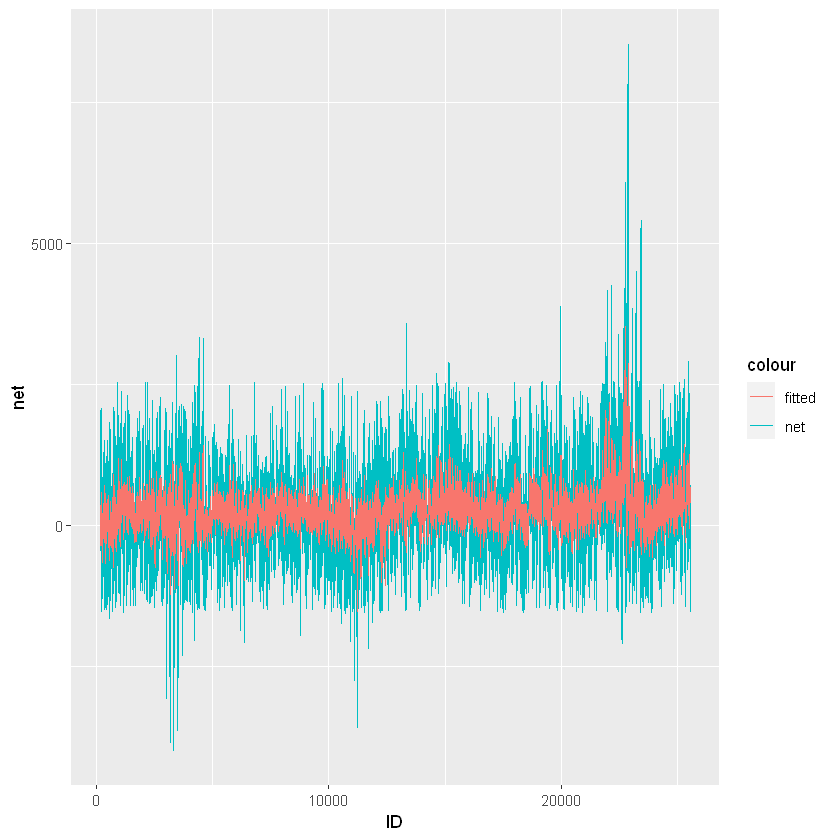

In [28]:
ggplot(train, aes(x = ID))+
geom_line(aes(y = net, color = 'net'))+
geom_line(aes(y = predict(lag_lm,train), color = 'fitted'))

# Combined Models

In [29]:
comb1 <- lm(net ~ hour + is_monday + is_wday + is_friday + is_saturday + is_sunday + lag_24 + lag_168 + last_obs,train)
summary(comb1)


Call:
lm(formula = net ~ hour + is_monday + is_wday + is_friday + is_saturday + 
    is_sunday + lag_24 + lag_168 + last_obs, data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-3572.4  -488.7   -18.5   460.4  6377.9 

Coefficients: (1 not defined because of singularities)
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -7.357e+01  2.589e+01  -2.842 0.004488 ** 
hour1        1.103e+02  3.274e+01   3.369 0.000755 ***
hour2        5.948e+01  3.273e+01   1.818 0.069148 .  
hour3       -2.801e+00  3.272e+01  -0.086 0.931767    
hour4       -8.690e+01  3.279e+01  -2.650 0.008050 ** 
hour5       -1.004e+02  3.279e+01  -3.063 0.002191 ** 
hour6       -1.790e+02  3.290e+01  -5.441 5.33e-08 ***
hour7       -7.171e+01  3.274e+01  -2.191 0.028492 *  
hour8       -2.362e+01  3.275e+01  -0.721 0.470735    
hour9        1.359e+02  3.276e+01   4.148 3.36e-05 ***
hour10       1.348e+02  3.275e+01   4.115 3.88e-05 ***
hour11       2.194e+02  3.280e+01   6.688 2.31e-1

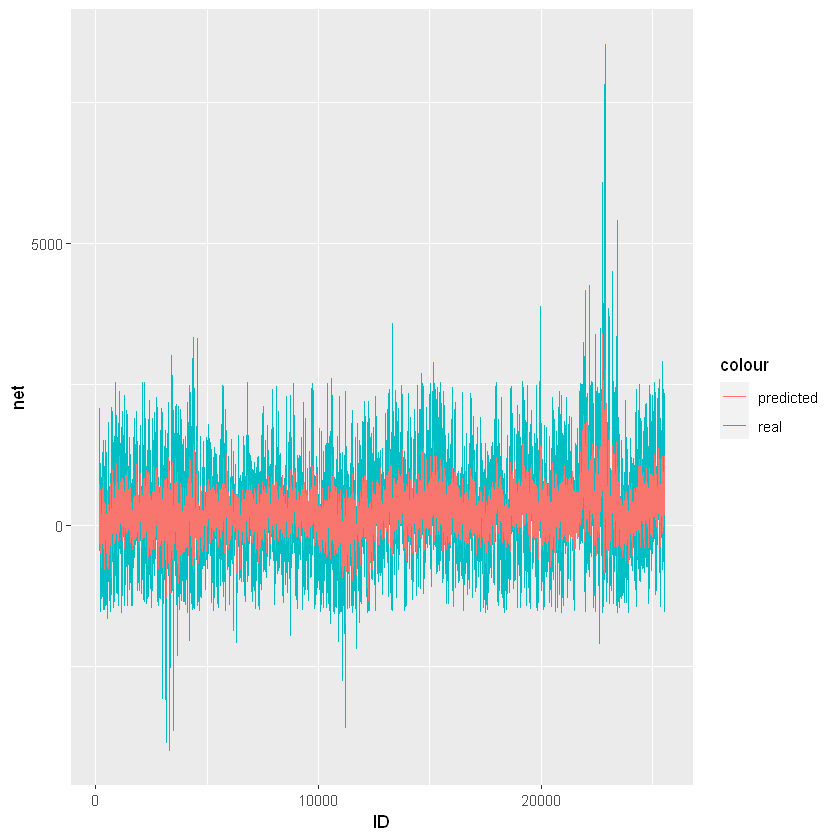

In [30]:
ggplot(train, aes(x=ID))+
geom_line(aes(y=net, color="real"))+
geom_line(aes(y=predict(comb1,train), color = 'predicted'))

[1] -3.695862e-14


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 15 lags. 

Value of test-statistic is: 1.0932 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739


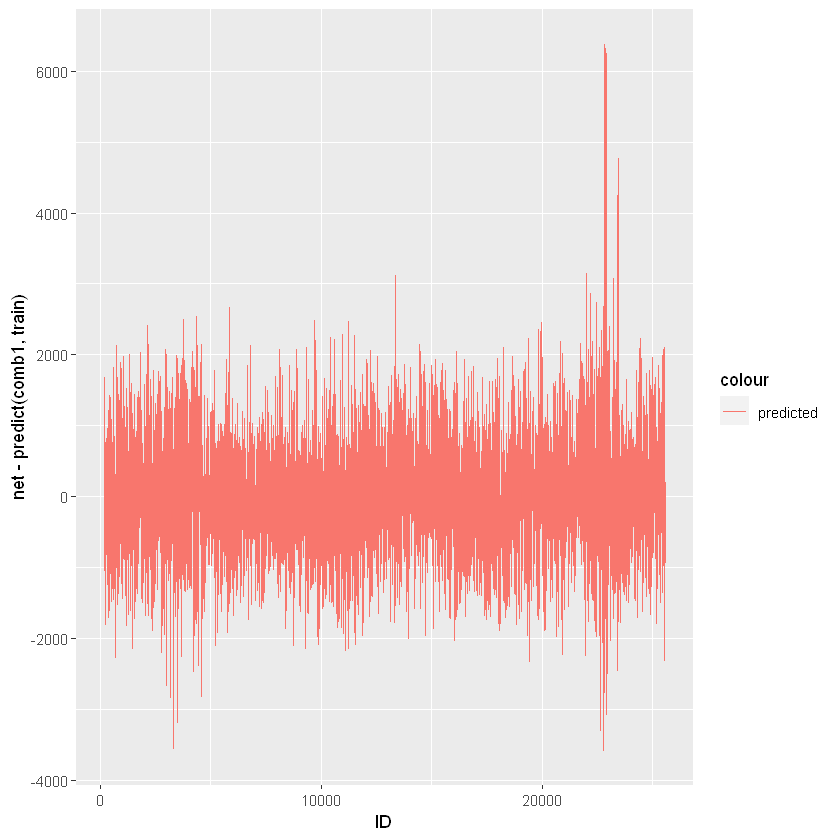

In [31]:
ggplot(train, aes(x=ID))+
geom_line(aes(y=net - predict(comb1,train), color = 'predicted'))

residuals = train$net - comb1$fitted
mean(residuals)
summary(ur.kpss(residuals))

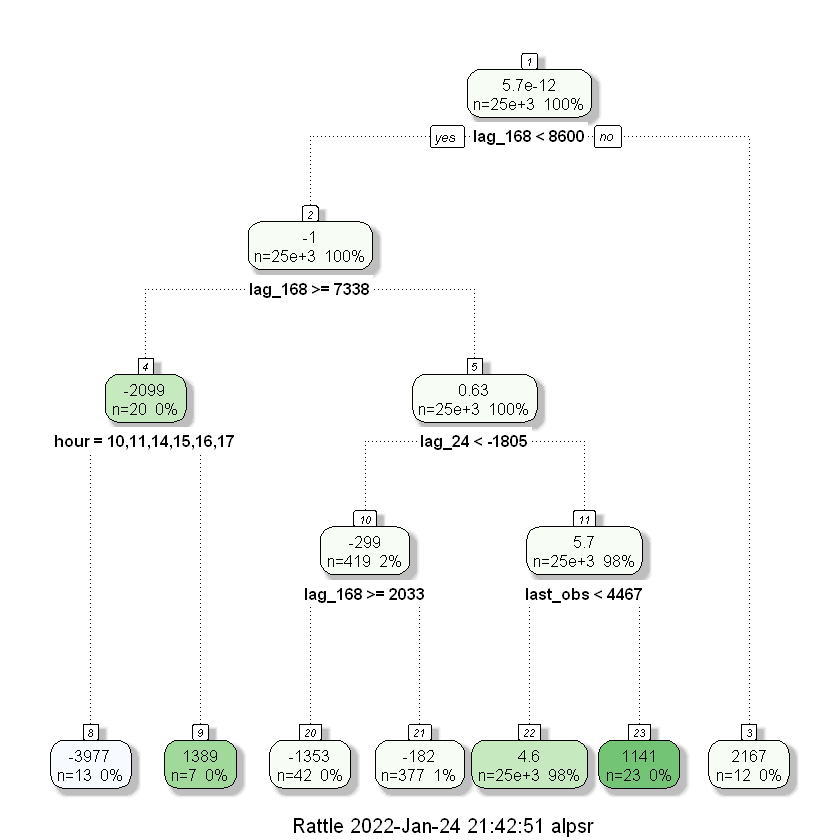

In [32]:
train[,Residuals1 := predict(comb1, train) - net]
tree1 = rpart(Residuals1 ~ hour + is_monday + is_wday + is_friday + is_saturday + is_sunday + lag_24 + lag_168 + last_obs,
              train,control=rpart.control(cp=0,maxdepth=4))
fancyRpartPlot(tree1)

In [33]:
train[, Binary1 := ifelse(lag_168 < 8600 & lag_168 >= 7338 & (hour %in% c(10,11,14,15,16,17)),1,0)]

In [34]:
comb2 <- lm(net ~ ID + hour + is_monday + is_wday + is_friday + is_saturday +
            is_sunday + lag_24 + lag_168 + last_obs + Binary1, train)
summary(comb2)


Call:
lm(formula = net ~ ID + hour + is_monday + is_wday + is_friday + 
    is_saturday + is_sunday + lag_24 + lag_168 + last_obs + Binary1, 
    data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-5892.8  -485.8   -19.5   461.2  5657.7 

Coefficients: (1 not defined because of singularities)
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.477e+02  2.708e+01  -5.452 5.01e-08 ***
ID           5.549e-03  6.593e-04   8.417  < 2e-16 ***
hour1        1.137e+02  3.246e+01   3.502 0.000462 ***
hour2        6.112e+01  3.244e+01   1.884 0.059572 .  
hour3       -2.002e+00  3.243e+01  -0.062 0.950786    
hour4       -8.643e+01  3.250e+01  -2.659 0.007835 ** 
hour5       -1.008e+02  3.250e+01  -3.103 0.001919 ** 
hour6       -1.819e+02  3.261e+01  -5.578 2.46e-08 ***
hour7       -7.561e+01  3.245e+01  -2.330 0.019824 *  
hour8       -2.273e+01  3.246e+01  -0.700 0.483775    
hour9        1.433e+02  3.247e+01   4.412 1.03e-05 ***
hour10       1.338e+02  3.247

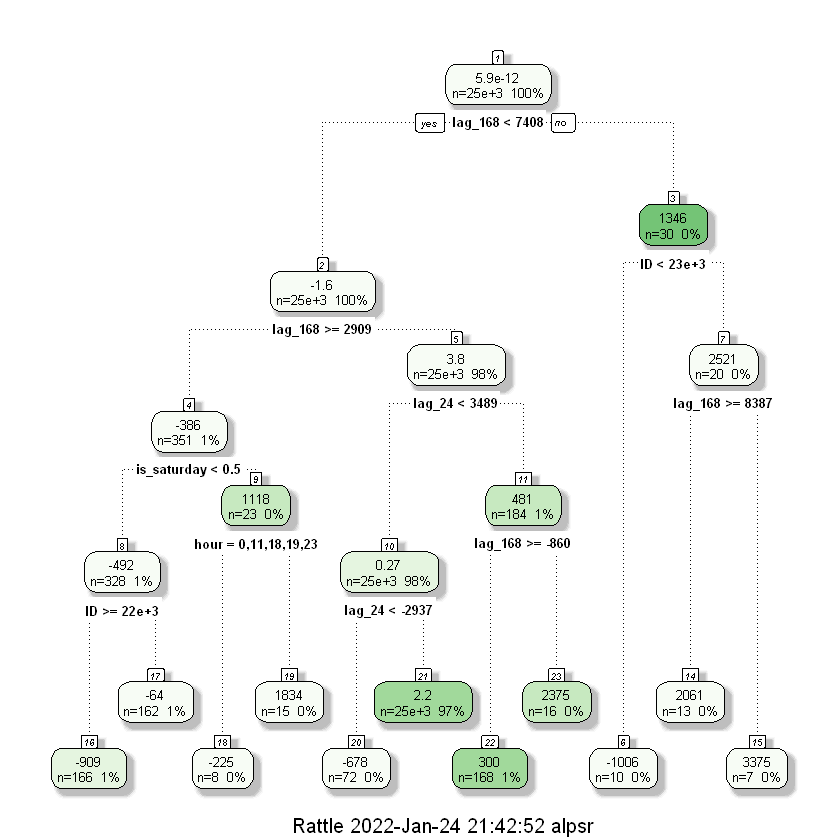

In [35]:
train[,Residuals2 := predict(comb2, train) - net]
tree2 = rpart(Residuals2 ~ ID + hour + is_monday + is_wday + is_friday +
              is_saturday + is_sunday + lag_24 + lag_168 + last_obs + Binary1,
              train,control=rpart.control(cp=0,maxdepth=4))
fancyRpartPlot(tree2)

In [36]:
train[, Binary2 := ifelse(lag_168 < 7408 & lag_168 < 2909 & lag_24 >= 3489 & lag_168 < -860,1,0)] #2375
train[, Binary3 := ifelse(lag_168 >= 7408 & ID >= 23000 & lag_168 < 8387,1,0)] # 3375
train[, Binary4 := ifelse(lag_168 >= 7408 & ID >= 23000 & lag_168 >= 8387,1,0)] # 2061

In [37]:
comb3 <- lm(net ~ ID + hour + is_monday + is_wday + is_friday + is_saturday +
            is_sunday + lag_24 + lag_168 + last_obs + Binary1 + Binary2 + Binary3 + Binary4, train)
summary(comb3)


Call:
lm(formula = net ~ ID + hour + is_monday + is_wday + is_friday + 
    is_saturday + is_sunday + lag_24 + lag_168 + last_obs + Binary1 + 
    Binary2 + Binary3 + Binary4, data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-5904.9  -486.6   -20.4   460.2  5670.8 

Coefficients: (3 not defined because of singularities)
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.521e+02  2.700e+01  -5.635 1.77e-08 ***
ID           5.701e-03  6.573e-04   8.674  < 2e-16 ***
hour1        1.133e+02  3.235e+01   3.501 0.000465 ***
hour2        6.091e+01  3.233e+01   1.884 0.059598 .  
hour3       -1.989e+00  3.233e+01  -0.062 0.950938    
hour4       -8.615e+01  3.240e+01  -2.659 0.007836 ** 
hour5       -1.005e+02  3.240e+01  -3.102 0.001923 ** 
hour6       -1.812e+02  3.251e+01  -5.574 2.51e-08 ***
hour7       -7.514e+01  3.235e+01  -2.323 0.020184 *  
hour8       -2.260e+01  3.235e+01  -0.699 0.484775    
hour9        1.427e+02  3.237e+01   4.408 1.05e-05 ***

In [ ]:
train[,Residuals3 := predict(comb3, train) - net]
tree3 = rpart(Residuals3 ~ ID + hour + is_monday + is_wday + is_friday +
              is_saturday + is_sunday + lag_24 + lag_168 + last_obs
              + Binary1 + Binary2 + Binary3 + Binary4,
              train,control=rpart.control(cp=0,maxdepth=4))

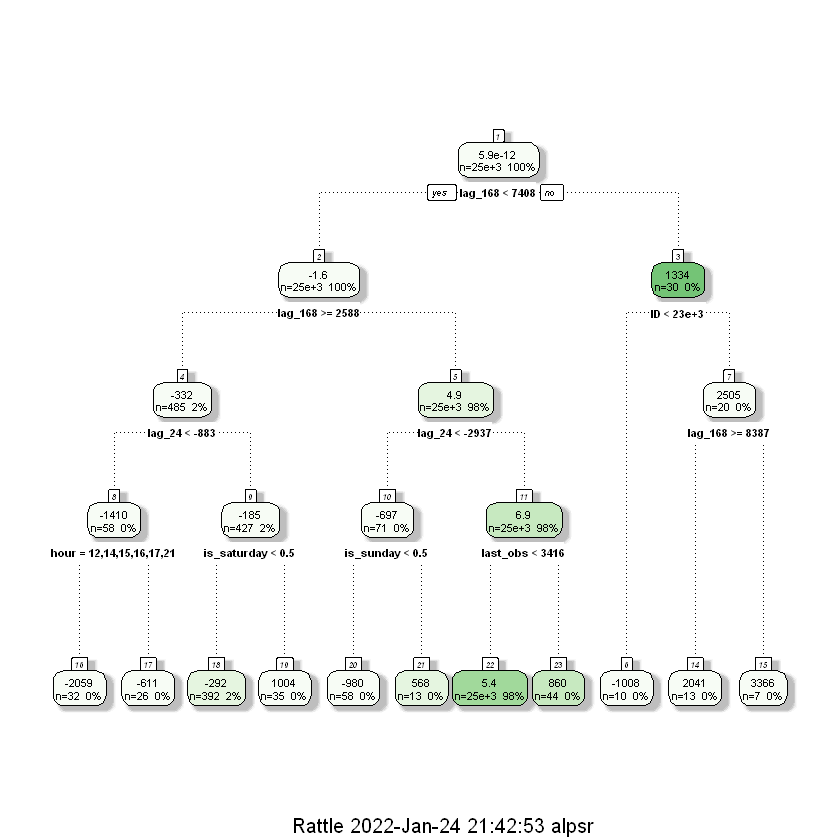

In [38]:
fancyRpartPlot(tree3)

In [ ]:
train[, Binary5 := ifelse(lag_168 < 8387 & lag_168 > 7408 & ID < 23000,1,0)]
train[, Binary6 := ifelse(lag_168 >= 8387 & lag_168 > 7408 & ID < 23000,1,0)]
comb4 <- lm(net ~ ID + hour + is_monday + is_wday + is_friday + is_saturday +
            is_sunday + lag_24 + lag_168 + last_obs + Binary1 + Binary2 + Binary3 +
            Binary4 + Binary5 + Binary6, train)

In [39]:
summary(comb4)


Call:
lm(formula = net ~ ID + hour + is_monday + is_wday + is_friday + 
    is_saturday + is_sunday + lag_24 + lag_168 + last_obs + Binary1 + 
    Binary2 + Binary3 + Binary4 + Binary5 + Binary6, data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-5359.3  -486.7   -19.4   458.8  5576.1 

Coefficients: (3 not defined because of singularities)
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.507e+02  2.690e+01  -5.600 2.17e-08 ***
ID           5.680e-03  6.549e-04   8.673  < 2e-16 ***
hour1        1.115e+02  3.224e+01   3.460 0.000542 ***
hour2        6.001e+01  3.222e+01   1.863 0.062525 .  
hour3       -2.290e+00  3.221e+01  -0.071 0.943334    
hour4       -8.594e+01  3.228e+01  -2.662 0.007770 ** 
hour5       -9.990e+01  3.228e+01  -3.095 0.001973 ** 
hour6       -1.792e+02  3.239e+01  -5.534 3.17e-08 ***
hour7       -7.327e+01  3.223e+01  -2.273 0.023032 *  
hour8       -2.275e+01  3.224e+01  -0.706 0.480499    
hour9        1.394e+02  3.226e+01 

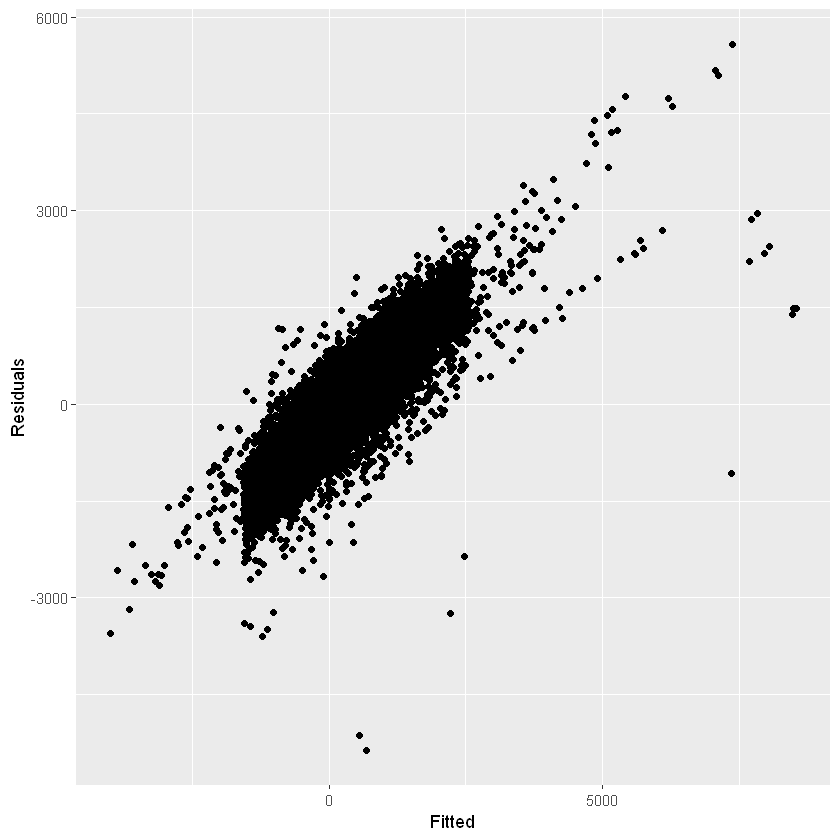

In [61]:
ggplot(train, aes(x=net))+
geom_point(aes(y = comb4$residuals))+
labs(y = "Residuals")+
labs(x = "Fitted")

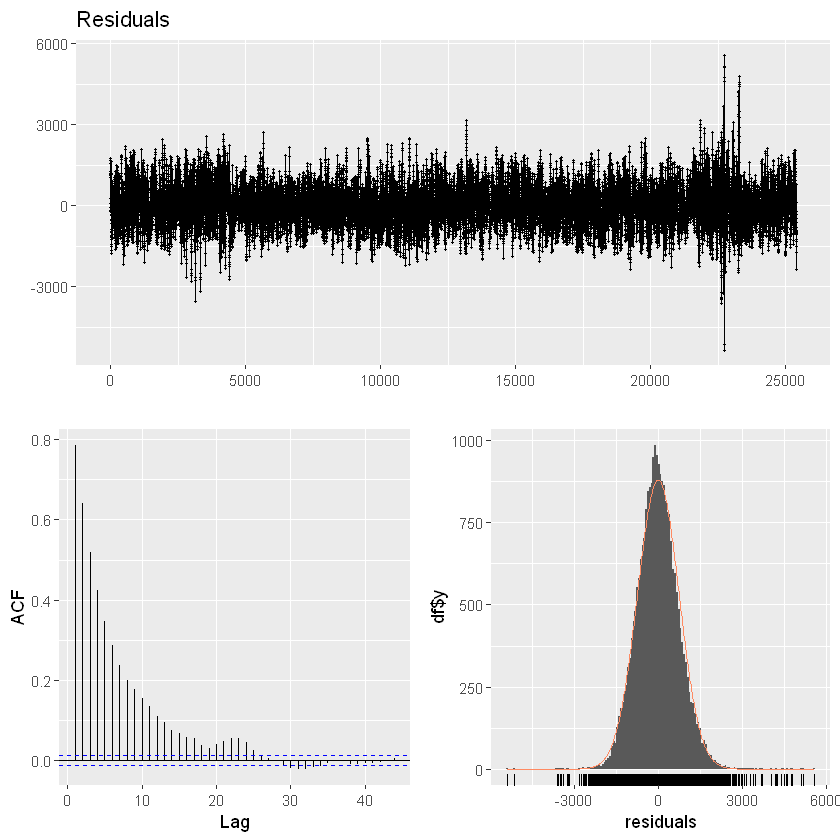

In [40]:
checkresiduals(comb4$residuals)

In [41]:
train[, Final_Predict := predict(comb4, train)]
perf_dt("EBLR",train$net,train$Final_Predict)

name,n,mean,sd,FBias,MAPE,RMSE,MAD,WMAPE
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
EBLR,25392,273.4027,841.6478,-2.157312e-14,Inf,4.645743,577.0092,2.110474


In [42]:
data[, Binary1 := ifelse(lag_168 < 8600 & lag_168 >= 7338 & (hour %in% c(10,11,14,15,16,17)),1,0)]
data[, Binary2 := ifelse(lag_168 < 7408 & lag_168 < 2909 & lag_24 >= 3489 & lag_168 < -860,1,0)] #2375
data[, Binary3 := ifelse(lag_168 >= 7408 & ID >= 23000 & lag_168 < 8387,1,0)] # 3375
data[, Binary4 := ifelse(lag_168 >= 7408 & ID >= 23000 & lag_168 >= 8387,1,0)] # 2061
data[, Binary5 := ifelse(lag_168 < 8387 & lag_168 > 7408 & ID < 23000,1,0)]
data[, Binary6 := ifelse(lag_168 >= 8387 & lag_168 > 7408 & ID < 23000,1,0)]

In [43]:
start = as.Date('2021-12-01')
end = as.Date('2021-12-15')

estimates <- matrix(0,nrow = 14, ncol = 18)

for(i in seq(0,13)){
    
    t_train= data[(date <= start-1+i) | (date == (start + i) & hour_num <= 5) ,]
    t_test = data[date == (start + i) & hour_num > 5,]
    
    # BUILD THE LINEAER MODEL
    linmodel <- lm(net ~ ID + hour + is_monday + is_wday + is_friday + is_saturday +
                    is_sunday + lag_24 + lag_168 + last_obs + Binary1 + Binary2 + Binary3 + Binary4 + Binary5,t_train)
    
    # ESTIMATE THE LINEAR MODEL
    linest = forecast(linmodel,t_test)
    estimates[i+1,] <- linest$mean
}

In [44]:
estimates

177.1247257,360.95012,268.1268,573.8635,408.11823,522.7930,370.6336,246.00841,396.0052,277.9611,361.5429,428.8433,405.4454,548.9574,501.2510,406.6868,412.1844,528.4395
450.9309312,423.35642,811.2227,899.4707,737.35822,810.6992,349.9172,255.50598,520.6522,509.9519,611.6592,725.2184,736.7790,511.3110,484.6873,410.3934,270.1185,232.5713
212.3356642,84.58262,337.9373,814.5500,961.94349,836.3680,444.5929,399.15721,640.5953,490.9704,438.4901,840.0755,797.3847,883.3489,881.8577,888.7232,1032.7316,630.8032
487.4031071,380.62842,546.8499,683.7598,646.75151,942.8059,831.8021,663.21118,938.2070,933.1020,956.7714,981.2906,944.7946,750.7954,639.8003,454.0628,582.0355,643.5594
-21.1988483,29.26564,100.5834,449.4157,353.12459,546.8112,472.2467,374.59259,575.3864,680.3627,686.1038,911.6529,942.1198,696.7206,563.0988,488.5484,459.4825,322.3062
464.6582970,374.01998,440.8401,678.0290,434.41778,504.8265,521.0755,279.54754,523.8259,578.2483,429.9601,728.4732,916.1781,643.9217,480.4297,398.5112,227.1253,220.4397
-19.3049863,217.20416,241.3681,670.1748,545.55357,622.1208,372.9404,298.35141,479.8005,344.5028,410.4500,648.4063,673.5798,591.1958,412.8181,437.3575,267.7532,639.6516
398.1476521,244.33444,556.8153,675.2673,531.67962,654.6479,263.3800,291.36609,605.9396,653.9276,709.7663,813.7565,678.4331,362.6445,372.4822,415.8347,370.3259,339.2796
458.9905403,310.85602,551.7389,729.4560,756.45710,884.6115,356.5606,365.22288,719.9727,761.1129,707.8256,1052.6650,930.3387,660.5856,570.1311,481.6286,472.1355,226.1911
306.1020977,210.20625,575.7202,774.5580,617.11186,670.6538,357.0012,331.08948,701.7763,498.0565,557.9493,859.6399,852.3538,708.8677,602.4838,620.3356,747.1392,541.9337
422.8802492,294.16723,582.5337,801.4377,548.94067,782.0899,422.2357,270.86382,641.0876,873.5874,913.7743,1079.1722,1080.5013,940.2592,831.7740,838.0831,696.0560,479.8624


In [45]:
pred_vec <- c(estimates[,seq(7,18)]) # these are predictions that we care about

In [46]:
est_directions <- sign(pred_vec)
est_directions[pred_vec<=50&pred_vec>=-50] <- 0

In [47]:
est_directions

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [75] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[112] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[149] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

In [48]:
test_final = data[date >= start & (end > date) & (hour_num >= 12),]
test_final

date,hour,net,upRegulationZeroCoded,upRegulationOneCoded,upRegulationTwoCoded,downRegulationZeroCoded,downRegulationOneCoded,downRegulationTwoCoded,upRegulationDelivered,downRegulationDelivered,system_direction,ID,last_obs,lag_24,lag_168,lag_6,lag_7,lag_8,weekday,is_monday,is_wday,is_friday,is_saturday,is_sunday,is_over,is_12,is_13,is_22,is_23,hour_num,Binary1,Binary2,Binary3,Binary4,Binary5,Binary6
<date>,<fct>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2021-12-01,12,-600.630,0.000,284,0,902.433,0.000,0,284.000,-884.630,Negative,25573,40.000,-311.200,726.598,572.717,109.466,40.000,4,0,1,0,0,0,0,1,0,0,0,12,0,0,0,0,0,0
2021-12-01,13,-640.230,0.000,240,0,893.000,0.000,0,240.000,-880.230,Negative,25574,40.000,-768.558,681.341,110.261,572.717,109.466,4,0,1,0,0,0,0,0,1,0,0,13,0,0,0,0,0,0
2021-12-01,14,-89.826,0.000,240,0,347.866,0.000,0,240.000,-329.826,Negative,25575,40.000,-945.563,1002.153,1648.510,110.261,572.717,4,0,1,0,0,0,0,0,0,0,0,14,0,0,0,0,0,0
2021-12-01,15,-157.171,0.000,240,0,406.633,0.000,0,240.000,-397.171,Negative,25576,40.000,-1530.633,837.056,1462.800,1648.510,110.261,4,0,1,0,0,0,0,0,0,0,0,15,0,0,0,0,0,0
2021-12-01,16,922.156,1698.917,0,0,0.000,0.000,0,922.156,0.000,Positive,25577,40.000,-839.498,800.743,1050.640,1462.800,1648.510,4,0,1,0,0,0,0,0,0,0,0,16,0,0,0,0,0,0
2021-12-01,17,918.083,1664.683,0,0,0.000,0.000,0,918.083,0.000,Positive,25578,40.000,-432.022,670.231,1110.305,1050.640,1462.800,4,0,1,0,0,0,1,0,0,0,0,17,0,0,0,0,0,0
2021-12-01,18,1102.057,1844.967,0,0,0.000,0.000,0,1102.057,0.000,Positive,25579,40.000,-500.934,711.296,-600.630,1110.305,1050.640,4,0,1,0,0,0,1,0,0,0,0,18,0,0,0,0,0,0
2021-12-01,19,498.656,1057.616,0,0,0.000,0.000,0,498.656,0.000,Positive,25580,40.000,-265.800,1511.119,-640.230,-600.630,1110.305,4,0,1,0,0,0,1,0,0,0,0,19,0,0,0,0,0,0
2021-12-01,20,343.707,350.617,0,0,0.000,0.000,0,343.707,0.000,Positive,25581,40.000,-260.893,1318.200,-89.826,-640.230,-600.630,4,0,1,0,0,0,1,0,0,0,0,20,0,0,0,0,0,0


In [49]:
real_directions <- sign(test_final$net)
real_directions

[1] -1 -1 -1 -1  1  1  1  1  1  1  1  0 -1 -1  1 -1 -1  1  1  1  1  1  1 -1  1
 [26]  1  1  1  1  1  1  1  1  1  1  1 -1 -1  1  1  1  1  1  1  1  1  1 -1  1  1
 [51]  1  1  1  1  1  1  1 -1  0 -1 -1 -1  1 -1 -1  1  1  1 -1 -1 -1  1  1  1  1
 [76]  1  1  1  1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1 -1
[101] -1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1 -1 -1  1 -1  1
[126] -1  1  1  1  1 -1  1 -1  0  1  0  1  1  1  1  1  1  1  1  1  1  1  1  1  1
[151]  1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1 -1  1  1 -1  1

In [50]:
real_directions[test_final$net <= 50 & test_final$net >= -50] <- 0
print(sum(real_directions == est_directions) / length(real_directions))

[1] 0.7142857


In [51]:
df <- data.frame (real  = real_directions,
                  predicted = est_directions)
table(df)

    predicted
real   1
  -1  37
  0   11
  1  120

In [52]:
confusionMatrix(data = as.factor(est_directions), reference = as.factor(real_directions), mode = "prec_recall")

Confusion Matrix and Statistics

          Reference
Prediction  -1   0   1
        -1   0   0   0
        0    0   0   0
        1   37  11 120

Overall Statistics
                                          
               Accuracy : 0.7143          
                 95% CI : (0.6396, 0.7812)
    No Information Rate : 0.7143          
    P-Value [Acc > NIR] : 0.5388          
                                          
                  Kappa : 0               
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: -1 Class: 0 Class: 1
Precision                   NA       NA   0.7143
Recall                  0.0000  0.00000   1.0000
F1                          NA       NA   0.8333
Prevalence              0.2202  0.06548   0.7143
Detection Rate          0.0000  0.00000   0.7143
Detection Prevalence    0.0000  0.00000   1.0000
Balanced Accuracy       0.5000  0.50000   0.5000